In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark import Row
from collections import OrderedDict
import pyspark
import logging

In [4]:
!pip install seaborn

     |████████████████████████████████| 285 kB 13.4 MB/s eta 0:00:01


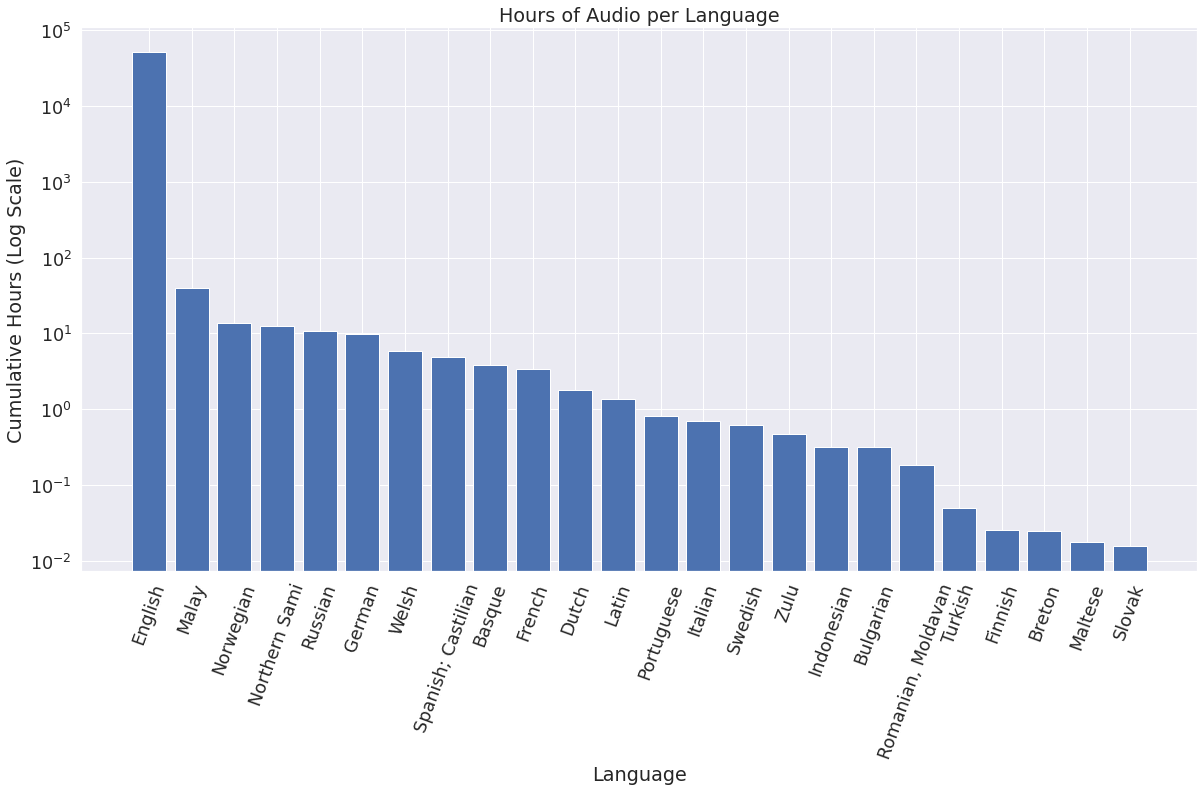

In [9]:

iso_639_mapping = OrderedDict([('ab', 'Abkhaz'),
                   ('aa', 'Afar'),
                   ('af', 'Afrikaans'),
                   ('ak', 'Akan'),
                   ('sq', 'Albanian'),
                   ('am', 'Amharic'),
                   ('ar', 'Arabic'),
                   ('an', 'Aragonese'),
                   ('hy', 'Armenian'),
                   ('as', 'Assamese'),
                   ('av', 'Avaric'),
                   ('ae', 'Avestan'),
                   ('ay', 'Aymara'),
                   ('az', 'Azerbaijani'),
                   ('bm', 'Bambara'),
                   ('ba', 'Bashkir'),
                   ('eu', 'Basque'),
                   ('be', 'Belarusian'),
                   ('bn', 'Bengali'),
                   ('bh', 'Bihari'),
                   ('bi', 'Bislama'),
                   ('bs', 'Bosnian'),
                   ('br', 'Breton'),
                   ('bg', 'Bulgarian'),
                   ('my', 'Burmese'),
                   ('ca', 'Catalan; Valencian'),
                   ('ch', 'Chamorro'),
                   ('ce', 'Chechen'),
                   ('ny', 'Chichewa; Chewa; Nyanja'),
                   ('zh', 'Chinese'),
                   ('cv', 'Chuvash'),
                   ('kw', 'Cornish'),
                   ('co', 'Corsican'),
                   ('cr', 'Cree'),
                   ('hr', 'Croatian'),
                   ('cs', 'Czech'),
                   ('da', 'Danish'),
                   ('dv', 'Divehi; Maldivian;'),
                   ('nl', 'Dutch'),
                   ('dz', 'Dzongkha'),
                   ('en', 'English'),
                   ('eo', 'Esperanto'),
                   ('et', 'Estonian'),
                   ('ee', 'Ewe'),
                   ('fo', 'Faroese'),
                   ('fj', 'Fijian'),
                   ('fi', 'Finnish'),
                   ('fr', 'French'),
                   ('ff', 'Fula'),
                   ('gl', 'Galician'),
                   ('ka', 'Georgian'),
                   ('de', 'German'),
                   ('el', 'Greek, Modern'),
                   ('gn', 'Guaraní'),
                   ('gu', 'Gujarati'),
                   ('ht', 'Haitian'),
                   ('ha', 'Hausa'),
                   ('he', 'Hebrew (modern)'),
                   ('hz', 'Herero'),
                   ('hi', 'Hindi'),
                   ('ho', 'Hiri Motu'),
                   ('hu', 'Hungarian'),
                   ('ia', 'Interlingua'),
                   ('id', 'Indonesian'),
                   ('ie', 'Interlingue'),
                   ('ga', 'Irish'),
                   ('ig', 'Igbo'),
                   ('ik', 'Inupiaq'),
                   ('io', 'Ido'),
                   ('is', 'Icelandic'),
                   ('it', 'Italian'),
                   ('iu', 'Inuktitut'),
                   ('ja', 'Japanese'),
                   ('jv', 'Javanese'),
                   ('kl', 'Kalaallisut'),
                   ('kn', 'Kannada'),
                   ('kr', 'Kanuri'),
                   ('ks', 'Kashmiri'),
                   ('kk', 'Kazakh'),
                   ('km', 'Khmer'),
                   ('ki', 'Kikuyu, Gikuyu'),
                   ('rw', 'Kinyarwanda'),
                   ('ky', 'Kirghiz, Kyrgyz'),
                   ('kv', 'Komi'),
                   ('kg', 'Kongo'),
                   ('ko', 'Korean'),
                   ('ku', 'Kurdish'),
                   ('kj', 'Kwanyama, Kuanyama'),
                   ('la', 'Latin'),
                   ('lb', 'Luxembourgish'),
                   ('lg', 'Luganda'),
                   ('li', 'Limburgish'),
                   ('ln', 'Lingala'),
                   ('lo', 'Lao'),
                   ('lt', 'Lithuanian'),
                   ('lu', 'Luba-Katanga'),
                   ('lv', 'Latvian'),
                   ('gv', 'Manx'),
                   ('mk', 'Macedonian'),
                   ('mg', 'Malagasy'),
                   ('ms', 'Malay'),
                   ('ml', 'Malayalam'),
                   ('mt', 'Maltese'),
                   ('mi', 'Māori'),
                   ('mr', 'Marathi (Marāṭhī)'),
                   ('mh', 'Marshallese'),
                   ('mn', 'Mongolian'),
                   ('na', 'Nauru'),
                   ('nv', 'Navajo, Navaho'),
                   ('nb', 'Norwegian Bokmål'),
                   ('nd', 'North Ndebele'),
                   ('ne', 'Nepali'),
                   ('ng', 'Ndonga'),
                   ('nn', 'Norwegian Nynorsk'),
                   ('no', 'Norwegian'),
                   ('ii', 'Nuosu'),
                   ('nr', 'South Ndebele'),
                   ('oc', 'Occitan'),
                   ('oj', 'Ojibwe, Ojibwa'),
                   ('cu', 'Old Church Slavonic'),
                   ('om', 'Oromo'),
                   ('or', 'Oriya'),
                   ('os', 'Ossetian, Ossetic'),
                   ('pa', 'Panjabi, Punjabi'),
                   ('pi', 'Pāli'),
                   ('fa', 'Persian'),
                   ('pl', 'Polish'),
                   ('ps', 'Pashto, Pushto'),
                   ('pt', 'Portuguese'),
                   ('qu', 'Quechua'),
                   ('rm', 'Romansh'),
                   ('rn', 'Kirundi'),
                   ('ro', 'Romanian, Moldavan'),
                   ('ru', 'Russian'),
                   ('sa', 'Sanskrit (Saṁskṛta)'),
                   ('sc', 'Sardinian'),
                   ('sd', 'Sindhi'),
                   ('se', 'Northern Sami'),
                   ('sm', 'Samoan'),
                   ('sg', 'Sango'),
                   ('sr', 'Serbian'),
                   ('gd', 'Scottish Gaelic'),
                   ('sn', 'Shona'),
                   ('si', 'Sinhala, Sinhalese'),
                   ('sk', 'Slovak'),
                   ('sl', 'Slovene'),
                   ('so', 'Somali'),
                   ('st', 'Southern Sotho'),
                   ('es', 'Spanish; Castilian'),
                   ('su', 'Sundanese'),
                   ('sw', 'Swahili'),
                   ('ss', 'Swati'),
                   ('sv', 'Swedish'),
                   ('ta', 'Tamil'),
                   ('te', 'Telugu'),
                   ('tg', 'Tajik'),
                   ('th', 'Thai'),
                   ('ti', 'Tigrinya'),
                   ('bo', 'Tibetan'),
                   ('tk', 'Turkmen'),
                   ('tl', 'Tagalog'),
                   ('tn', 'Tswana'),
                   ('to', 'Tonga'),
                   ('tr', 'Turkish'),
                   ('ts', 'Tsonga'),
                   ('tt', 'Tatar'),
                   ('tw', 'Twi'),
                   ('ty', 'Tahitian'),
                   ('ug', 'Uighur, Uyghur'),
                   ('uk', 'Ukrainian'),
                   ('ur', 'Urdu'),
                   ('uz', 'Uzbek'),
                   ('ve', 'Venda'),
                   ('vi', 'Vietnamese'),
                   ('vo', 'Volapük'),
                   ('wa', 'Walloon'),
                   ('cy', 'Welsh'),
                   ('wo', 'Wolof'),
                   ('fy', 'Western Frisian'),
                   ('xh', 'Xhosa'),
                   ('yi', 'Yiddish'),
                   ('yo', 'Yoruba'),
                   ('za', 'Zhuang, Chuang'),
                   ('zu', 'Zulu'),
                   ('', 'Unknown')])

rows = [
Row(language='en', duration=51891.210179162255),                                                                                                                                                      
Row(language='ro', duration=0.18604722861111112),                                                                                                                                                      
Row(language='sk', duration=0.015528331944444444),                                                                                                                                                     
Row(language='pt', duration=0.8029441672222222),                                                                                                                                                       
Row(language='ms', duration=39.340964462500004),                                                                                                                                                       
Row(language='tr', duration=0.0489819425),                                                                                                                                                             
Row(language='de', duration=9.84690971388889),                                                                                                                                                         
Row(language='br', duration=0.024625554166666667),                                                                                                                                                     
Row(language='es', duration=4.928195001111111),                                                                                                                                                        
Row(language='eu', duration=3.870641945),                                                                                                                                                              
Row(language='it', duration=0.7015947202777778),                                                                                                                                                       
Row(language='sv', duration=0.6141902797222223),                                                                                                                                                       
Row(language='nl', duration=1.8030086005555555),                                                                                                                                                       
Row(language='ru', duration=10.924616139444447),                                                                                                                                                       
Row(language='mt', duration=0.01752277777777778),                                                                                                                                                      
Row(language='no', duration=13.603658894999997),                                                                                                                                                       
Row(language='bg', duration=0.3130866666666667),                                                                                                                                                       
Row(language='cy', duration=5.814326111111112),                                                                                                                                                        
Row(language='zu', duration=0.4729961111111111),                                                                                                                                                       
#Row(language='',   duration=512.8351283508333),                                                                                                                                                          
Row(language='se', duration=12.611557778888889),                                                                                                                                                       
Row(language='fr', duration=3.429911108611111),                                                                                                                                                        
Row(language='id', duration=0.3214013883333333),
Row(language='la', duration=1.3733055555555556),
Row(language='fi', duration=0.025745555555555556)
]


sns.set()
sns.set_palette("bright")
sns.set(font_scale=1.6)

counts = {}

for row in sorted(rows, key=lambda item: item.duration, reverse=True):
  full_language = iso_639_mapping[row.language]
  counts[full_language] = row.duration

# counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True)[:20])
fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values())
ax.set_xticklabels(counts.keys(), rotation=70)
ax.set_yscale('log')
ax.set_ylabel("Cumulative Hours (Log Scale)")
ax.set_xlabel("Language")
ax.set_title("Hours of Audio per Language")
#ax.set_ylim([0, 150])
fig.set_size_inches(20, 10)

GALVEZ: 44100 23503.168311761947 44.746194354843475
GALVEZ: 48000 17733.63398750001 33.76194317704933
GALVEZ: 22050 8459.5085537325 16.10552283295112
GALVEZ: 24000 1084.5719555555556 2.06484789077628
GALVEZ: 16000 988.435469166667 1.8818197199574456
GALVEZ: 32000 533.8393130555557 1.0163428751129633
GALVEZ: 8000 182.26534 0.3470034430936782
GALVEZ: 11025 39.528464601388876 0.0752557415298406
GALVEZ: 12000 0.5620044444444444 0.0010699646858594839
GALVEZ:  0.0 0.0


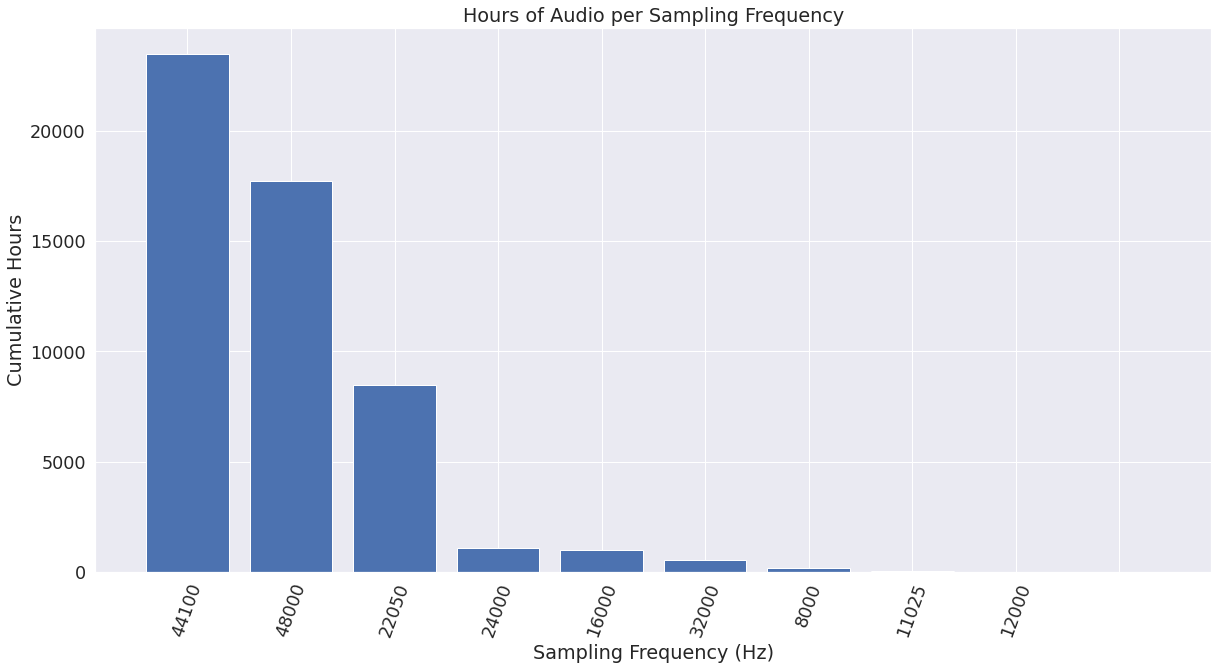

In [21]:
rows = [Row(sampling_rate="22050", duration=8459.5085537325),                                                                                                                                              
Row(sampling_rate="11025", duration=39.528464601388876),                                                                                                                                            
Row(sampling_rate="24000", duration=1084.5719555555556),                                                                                                                                            
Row(sampling_rate="44100", duration=23503.168311761947),                                                                                                                                            
Row(sampling_rate="12000", duration=0.5620044444444444),                                                                                                                                            
Row(sampling_rate="8000", duration=182.26534),                                                                                                                                                      
Row(sampling_rate="32000", duration=533.8393130555557),                                                                                                                                             
Row(sampling_rate='', duration=0.0),                                                                                                                                                                   
Row(sampling_rate="48000", duration=17733.63398750001),                                                                                                                                             
Row(sampling_rate="16000", duration=988.435469166667)]                                                                                                                                              
                                                                                                                                                                                                            
[Row(sampling_rate="b'22050'", count=13102),                                                                                                                                                                
Row(sampling_rate="b'11025'", count=63),                                                                                                                                                                    
Row(sampling_rate="b'24000'", count=2015),                                                                                                                                                                  
Row(sampling_rate="b'44100'", count=39439),                                                                                                                                                                 
Row(sampling_rate="b'12000'", count=1),                                                                                                                                                                     
Row(sampling_rate="b'8000'", count=289),                                                                                                                                                                    
Row(sampling_rate="b'32000'", count=880),                                                                                                                                                                   
Row(sampling_rate='', count=26),                                                                                                                                                                            
Row(sampling_rate="b'48000'", count=19085),                                                                                                                                                                 
Row(sampling_rate="b'16000'", count=1727)]              

sns.set()
sns.set_palette("bright")
sns.set(font_scale=1.6)

counts = {}

for row in sorted(rows, key=lambda item: item.duration, reverse=True):
  counts[row.sampling_rate] = row.duration
    
    
total = sum(item.duration for item in rows)
    
for row in sorted(rows, key=lambda item: item.duration, reverse=True):
  print("GALVEZ:", row.sampling_rate, row.duration, (row.duration / total) * 100)


fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values())
ax.set_xticklabels(counts.keys(), rotation=70)
#ax.set_ylim([0, 150])
ax.set_ylabel("Cumulative Hours")
ax.set_xlabel("Sampling Frequency (Hz)")
ax.set_title("Hours of Audio per Sampling Frequency")
fig.set_size_inches(20, 10)


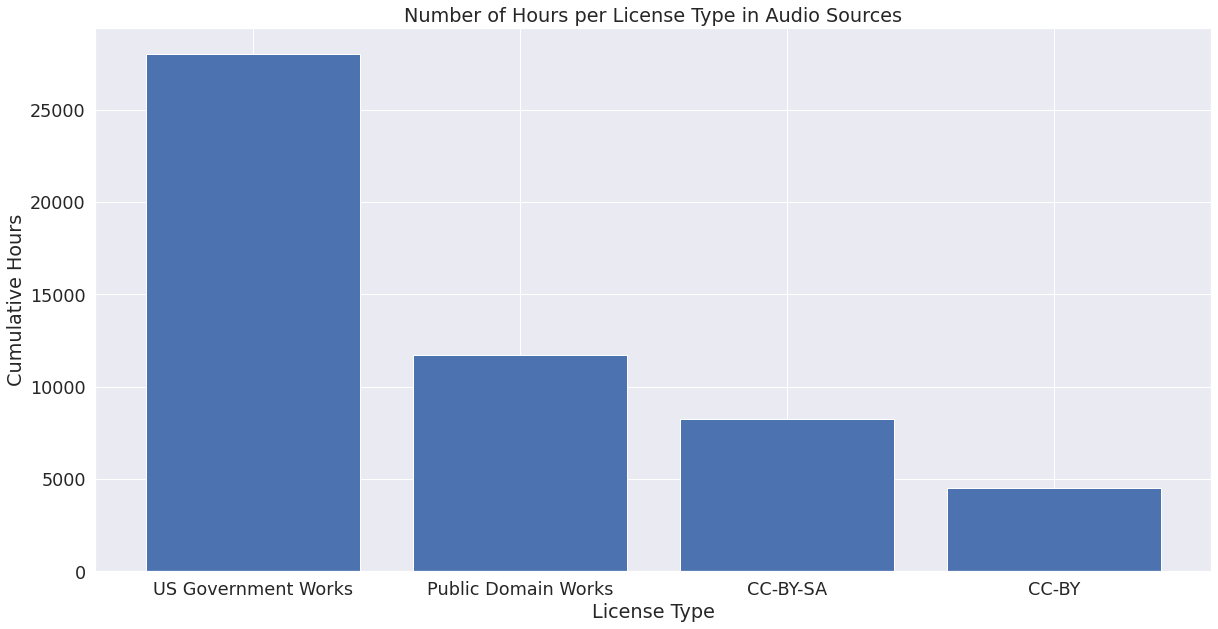

In [7]:
sns.set()
sns.set_palette("bright")
sns.set(font_scale=1.6)

counts = {"US Government Works": 28034,
          "Public Domain Works": 11713,
          "CC-BY-SA": 8273,
          "CC-BY": 4496}

fig, ax = plt.subplots()
ax.bar(counts.keys(), counts.values())
# ax.set_xticklabels(counts.keys(), rotation=70)
#ax.set_ylim([0, 150])
ax.set_ylabel("Cumulative Hours")
ax.set_xlabel("License Type")
ax.set_title("Number of Hours per License Type in Audio Sources")
fig.set_size_inches(20, 10)


In [7]:
  spark = pyspark.sql.SparkSession.builder \
                        .master("local[*]")\
                        .config("spark.eventLog.enabled", "true")\
                        .config("spark.eventLog.dir", "/spark-events")\
                        .config("spark.sql.execution.arrow.pyspark.enabled", "true")\
                        .config("spark.driver.extraJavaOptions", "-Dio.netty.tryReflectionSetAccessible=true")\
                        .config("spark.executor.extraJavaOptions", "-Dio.netty.tryReflectionSetAccessible=true")\
                        .config("spark.history.fs.logDirectory", "/spark-events")\
                        .config("spark.sql.execution.arrow.maxRecordsPerBatch", "1000")\
                        .getOrCreate()
#                         .config('spark.driver.memory', '310g')\
    
  spark.sparkContext.setLogLevel("INFO") # "ALL" for very verbose logging                                                                                                                                   
  logging.getLogger("py4j").setLevel(logging.ERROR)


In [8]:
df = spark.read.format('json').load("gs://the-peoples-speech-west-europe/forced-aligner/cuda-forced-aligner/output_work_dir_5b/output_work_dir_5b/dataset_manifest_mp3_956")

In [9]:
df.printSchema()

root
 |-- audio_document_id: string (nullable = true)
 |-- identifier: string (nullable = true)
 |-- text_document_id: string (nullable = true)
 |-- training_data: struct (nullable = true)
 |    |-- duration_ms: array (nullable = true)
 |    |    |-- element: long (containsNull = true)
 |    |-- label: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- output_paths: array (nullable = true)
 |    |    |-- element: string (containsNull = true)



In [16]:
import pyspark.sql.functions as F
#F.array_sum(df.training_data.duration_ms)
df = df.withColumn('total',F.expr('AGGREGATE(training_data.duration_ms, CAST(0 AS BIGINT), (acc, x) -> acc + x)'))
df.select(F.sum(df.total)).show()

+------------+
|  sum(total)|
+------------+
|113146535145|
+------------+



In [17]:
(113146535145 / 1000) / 60 / 60 

31429.59309583333